In [48]:
import numpy as np
import pandas as pd
import UtilsDataFrame as utilDf
import matplotlib.pyplot as plt
import statsmodels.tsa.seasonal as STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

df_csv_dmg = pd.read_csv("./testData/300mm_DMG_20092025.csv")
df_csv_nodmg = pd.read_csv("./testData/300mm_NoDMG_20092025.csv")
df_csv_dmg_edited = pd.read_csv("./testData/300mm_DMF_20092025_edited.csv")
df_csv_nodmg_edited = pd.read_csv("./testData/300mm_NoDMG_20092025_edited.csv")

df_dmg_tmp = utilDf.createTimeSeriesDataFrame(df_csv_dmg, "Temp_ax8", "Temp_ax8")
df_dmg_nodmg_tmp = utilDf.createTimeSeriesDataFrame(df_csv_nodmg, "Temp_ax8", "Temp_ax8")

df_dmg_trq = utilDf.createTimeSeriesDataFrame(df_csv_dmg, "Torque_ax8", "Torque_ax8")
df_dmg_nodmg_trq = utilDf.createTimeSeriesDataFrame(df_csv_nodmg, "Torque_ax8", "Torque_ax8")
df_dmg_edited_trq = utilDf.createTimeSeriesDataFrame(df_csv_dmg_edited, "Torque_ax8", "Torque_ax8")
df_dmg_nodmg_edited_trq = utilDf.createTimeSeriesDataFrame(df_csv_nodmg_edited, "Torque_ax8", "Torque_ax8")


In [49]:
# plt.plot(df_dmg_tmp, label="Damaged Mill (TMP)")
# plt.plot(df_dmg_nodmg_tmp, label="Not Damaged Mill (TMP)")
# plt.legend(title="Legends", loc="upper left")
# plt.show()


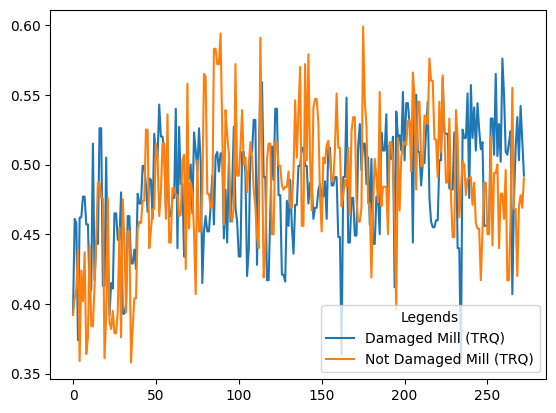

mean damaged
Torque_ax8    0.484
dtype: float64 Torque_ax8    0.001633
dtype: float64
mean undamaged
Torque_ax8    0.4833
dtype: float64 Torque_ax8    0.002311
dtype: float64


In [50]:
# df_dmg_trq["Torque_ax8"] = df_dmg_trq["Torque_ax8"] .abs()
# df_dmg_nodmg_trq["Torque_ax8"] = df_dmg_nodmg_trq["Torque_ax8"] .abs()
# df_dmg_edited_trq["Torque_ax8"] = df_dmg_edited_trq["Torque_ax8"] .abs()
# plt.plot(df_dmg_trq, label="Damaged Mill (TRQ)")
# plt.plot(df_dmg_nodmg_trq, label="Not Damaged Mill (TRQ)")
# plt.legend(title="Legends", loc="lower right")
# plt.show()


df_dmg_edited_trq["Torque_ax8"] = df_dmg_edited_trq["Torque_ax8"].abs()
df_dmg_nodmg_edited_trq["Torque_ax8"] = df_dmg_nodmg_edited_trq["Torque_ax8"].abs()
plt.plot(df_dmg_edited_trq, label="Damaged Mill (TRQ)")
plt.plot(df_dmg_nodmg_edited_trq, label="Not Damaged Mill (TRQ)")
plt.legend(title="Legends", loc="lower right")
plt.show()
print("mean damaged")
print(df_dmg_edited_trq.mean(), df_dmg_edited_trq.var())
print("mean undamaged")
print(df_dmg_nodmg_edited_trq.mean(), df_dmg_nodmg_edited_trq.var())

# stl_testData_power = STL.STL(df_dmg_trq["Torque_ax8"], period=44)
# res = stl_testData_power.fit()

# fig, axes = plt.subplots(4, 1, figsize=(10,6), sharex=True)
# axes[0].plot(df_dmg_trq.index, res.observed, color="black")
# axes[0].set_ylabel("Nm")
# axes[0].set_xlabel("Observed")
# print(res.observed)

# axes[1].plot(df_dmg_trq.index, res.trend, color="darkseagreen")
# axes[1].set_ylabel("Trend Torque")

# axes[2].plot(df_dmg_trq.index, res.seasonal, color="orangered")
# axes[2].set_ylabel("Season Torque")

# axes[3].plot(df_dmg_trq.index, res.resid, color="darkslateblue")
# axes[3].set_ylabel("Residual Torque")
# axes[3].set_xlabel("Time elapsed in seconds")

# plt.tight_layout()
# plt.show()

# res_df = pd.DataFrame(res.resid)
# res_df.rename(columns={"resid":"Torque_ax8"}, inplace=True)

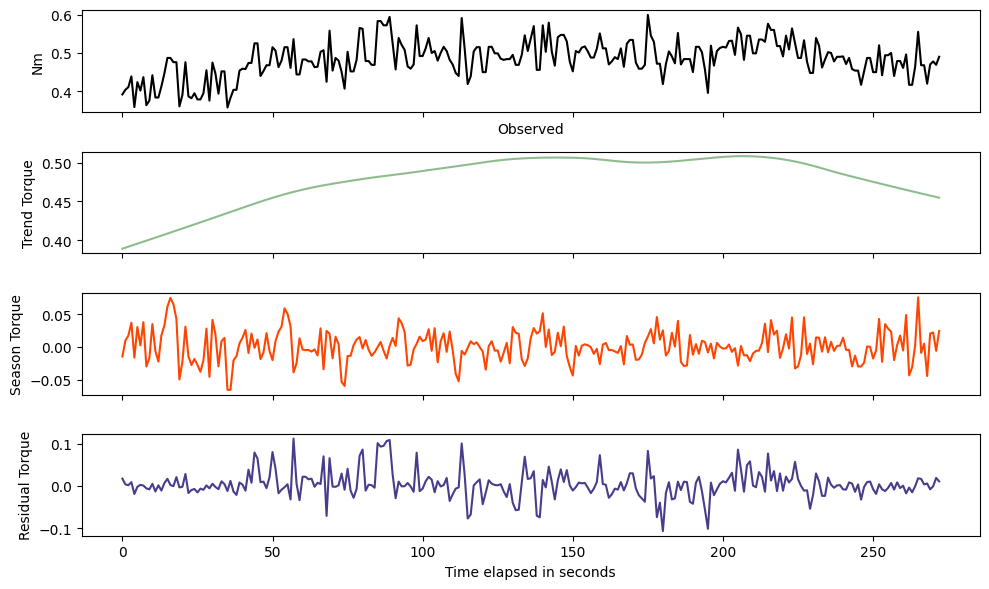

In [51]:
stl_testData_power = STL.STL(df_dmg_nodmg_edited_trq["Torque_ax8"], period=38, robust=True)
res = stl_testData_power.fit()

fig, axes = plt.subplots(4, 1, figsize=(10,6), sharex=True)
axes[0].plot(df_dmg_nodmg_edited_trq.index, res.observed, color="black")
axes[0].set_ylabel("Nm")
axes[0].set_xlabel("Observed")

axes[1].plot(df_dmg_nodmg_edited_trq.index, res.trend, color="darkseagreen")
axes[1].set_ylabel("Trend Torque")

axes[2].plot(df_dmg_nodmg_edited_trq.index, res.seasonal, color="orangered")
axes[2].set_ylabel("Season Torque")

axes[3].plot(df_dmg_nodmg_edited_trq.index, res.resid, color="darkslateblue")
axes[3].set_ylabel("Residual Torque")
axes[3].set_xlabel("Time elapsed in seconds")

plt.tight_layout()
plt.show()



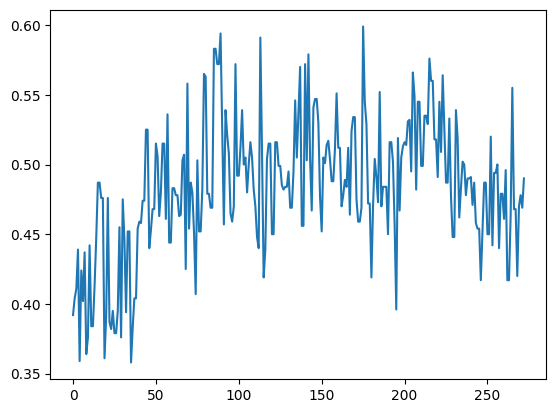

In [52]:
res_df = pd.DataFrame(df_dmg_nodmg_edited_trq)
res_df.rename(columns={"resid":"Torque_ax8"}, inplace=True)
plt.plot(res_df)
plt.show()

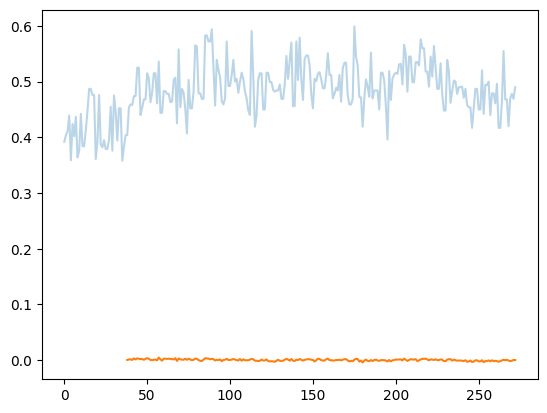

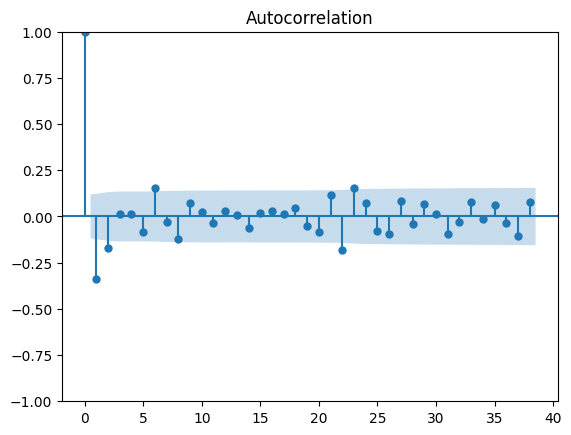

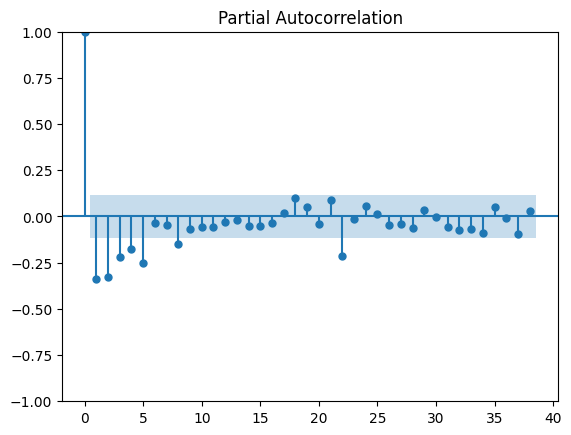

In [ ]:
roll = df_dmg_nodmg_edited_trq['Torque_ax8'].diff().dropna().rolling(38, min_periods=38).mean()
ax = res_df['Torque_ax8'].plot(alpha=0.3)
roll.plot(ax=ax)
diffed_df = df_dmg_nodmg_edited_trq['Torque_ax8'].diff().dropna()
plot_acf(df_dmg_nodmg_edited_trq, lags=38)
plt.show()
plot_pacf(df_dmg_nodmg_edited_trq, lags=38)
plt.show()

In [54]:
arima_Model = ARIMA(df_dmg_nodmg_edited_trq["Torque_ax8"], order=(1,1,1))
arima_Result = arima_Model.fit()
print(arima_Result.summary())
forecast = arima_Result.forecast(steps=50)
print(forecast)

                               SARIMAX Results                                
Dep. Variable:             Torque_ax8   No. Observations:                  273
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 504.687
Date:                Thu, 25 Sep 2025   AIC                          -1003.374
Time:                        09:04:04   BIC                           -992.556
Sample:                             0   HQIC                          -999.031
                                - 273                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2094      0.071      2.945      0.003       0.070       0.349
ma.L1         -0.8828      0.035    -25.567      0.000      -0.951      -0.815
sigma2         0.0014      0.000     11.582      0.0